In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings


warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/jeganm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv('commentInteractions_cleaned.csv')
df

,Unnamed: 0,employee,companyAlias,liked,disliked,commentId,likes
0,1,1,58b5f7cb917c350004dc0b09,True,False,594d1f4bdabcef0004334a02,1
1,2,11,58b5f7cb917c350004dc0b09,True,False,594d1f4bdabcef0004334a02,1
2,3,15,58b5f7cb917c350004dc0b09,True,False,594d1f4bdabcef0004334a02,1
3,4,11,58b5f7cb917c350004dc0b09,True,False,5950f66cd4e9f8000419da14,1
4,5,10,58b5f7cb917c350004dc0b09,True,False,595125c1d4e9f8000419db8f,1
...,...,...,...,...,...,...,...
580577,599099,29,5967a6d0fc71a50004e42647,False,True,5984482bdcc14100047a7fb2,0
580578,599100,46,5967a6d0fc71a50004e42647,False,True,5984482bdcc14100047a7fb2,0
580579,599101,64,5967a6d0fc71a50004e42647,False,True,5984482bdcc14100047a7fb2,0
580580,599102,16,5967a6d0fc71a50004e42647,False,True,5984482bdcc14100047a7fb2,0


In [3]:
# Data preprocessing
stop_words = set(stopwords.words('english'))
df['commentId'] = df['commentId'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['commentId'], df['likes'], test_size=0.2, random_state=42)

# Sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    return sentiment > 0  # Return True for positive sentiment, False otherwise

    if sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Make predictions on the test set
y_pred = X_test.apply(analyze_sentiment)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print(report_df)

Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29     19953
           1       0.00      0.00      0.00     96164

    accuracy                           0.17    116117
   macro avg       0.09      0.50      0.15    116117
weighted avg       0.03      0.17      0.05    116117

              precision    recall  f1-score        support
0              0.171835  1.000000  0.293276   19953.000000
1              0.000000  0.000000  0.000000   96164.000000
accuracy       0.171835  0.171835  0.171835       0.171835
macro avg      0.085918  0.500000  0.146638  116117.000000
weighted avg   0.029527  0.171835  0.050395  116117.000000


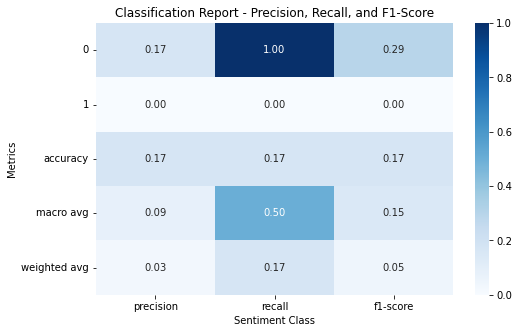

In [8]:
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report - Precision, Recall, and F1-Score')
plt.xlabel('Sentiment Class')
plt.ylabel('Metrics')
plt.show()